In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"indatuasela","key":"7fc6532c25f7f5875561c34e45f17a2f"}'}

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 May 11 08:32 kaggle.json


In [4]:
!pip install -q kaggle

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets list

ref                                                                title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                              Data Science Salaries 2023 💸                       25KB  2023-04-13 09:55:16          11691        302  1.0              
asahu40/walmart-data-analysis-and-forcasting                       Walmart Data Analysis and Forcasting              122KB  2023-04-26 07:07:03           1696         37  1.0              
ahmedshahriarsakib/usa-real-estate-dataset                         USA Real Estate Dataset                             1MB  2023-04-30 03:51:36           1368         40  1.0              
iammustafatz/diabetes-prediction-dataset               

In [7]:
!kaggle datasets download -d indatuasela/deep-learning-klasifikasi-jenis-durian

 36% 5.00M/14.0M [00:00<00:00, 43.2MB/s]
100% 14.0M/14.0M [00:00<00:00, 89.8MB/s]


In [8]:
!unzip deep-learning-klasifikasi-jenis-durian.zip

Archive:  deep-learning-klasifikasi-jenis-durian.zip
  inflating: Durian/Durian Mentega/durian-mentega1.jpg  
  inflating: Durian/Durian Mentega/durian-mentega10.jpg  
  inflating: Durian/Durian Mentega/durian-mentega11.jpg  
  inflating: Durian/Durian Mentega/durian-mentega12.jpg  
  inflating: Durian/Durian Mentega/durian-mentega13.jpg  
  inflating: Durian/Durian Mentega/durian-mentega14.jpg  
  inflating: Durian/Durian Mentega/durian-mentega15.jpg  
  inflating: Durian/Durian Mentega/durian-mentega16.png  
  inflating: Durian/Durian Mentega/durian-mentega17.jpg  
  inflating: Durian/Durian Mentega/durian-mentega18.jpg  
  inflating: Durian/Durian Mentega/durian-mentega19.jpg  
  inflating: Durian/Durian Mentega/durian-mentega2.jpg  
  inflating: Durian/Durian Mentega/durian-mentega20.jpg  
  inflating: Durian/Durian Mentega/durian-mentega21.jpg  
  inflating: Durian/Durian Mentega/durian-mentega22.jpg  
  inflating: Durian/Durian Mentega/durian-mentega23.jpg  
  inflating: Durian/D

In [9]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam
from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split

In [10]:
dataset_path = Path(r'/content/Durian')
file_path = list(dataset_path.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

In [11]:
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)
df = pd.concat([file_path, labels], axis=1)
df.columns = ['image', 'label']
df.head()

,image,label
0,/content/Durian/Durian Mentega/durian-mentega3...,Durian Mentega
1,/content/Durian/Durian Mentega/durian-mentega2...,Durian Mentega
2,/content/Durian/Durian Mentega/durian-mentega7...,Durian Mentega
3,/content/Durian/Durian Mentega/durian-mentega2...,Durian Mentega
4,/content/Durian/Durian Mentega/durian-mentega2...,Durian Mentega


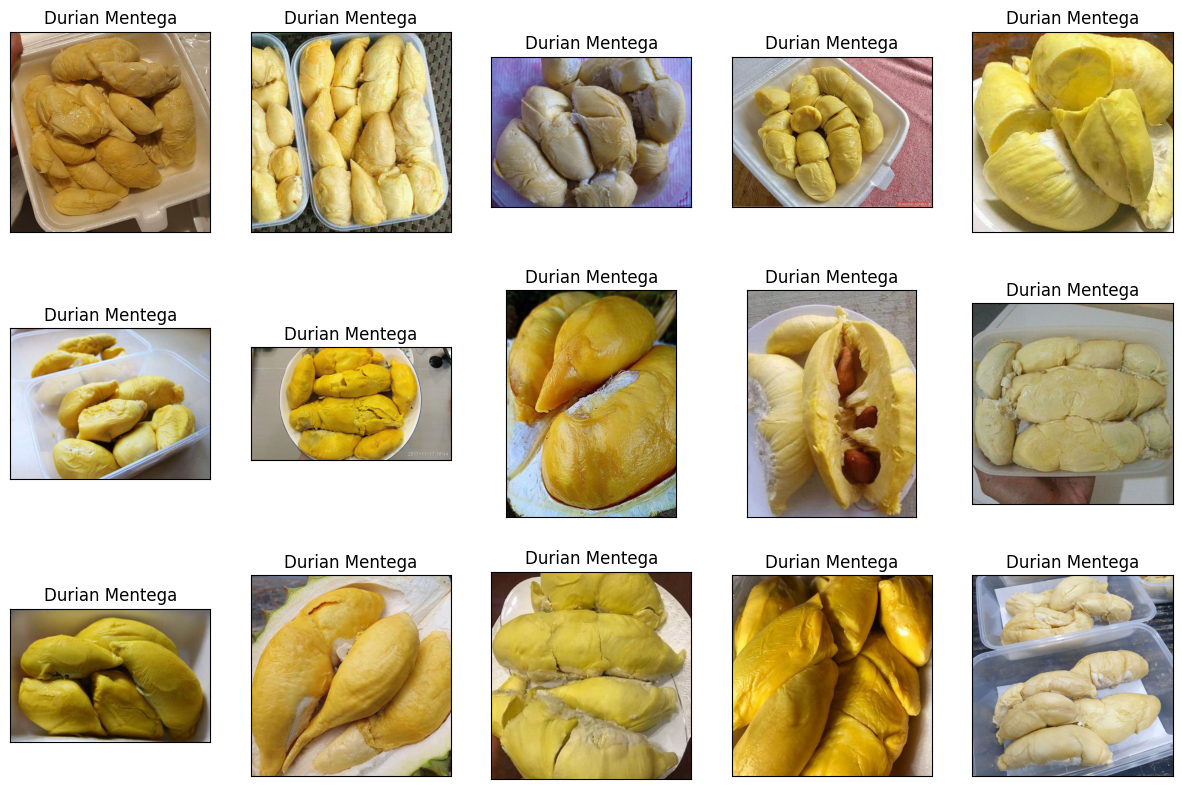

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[i]))
    ax.set_title(df.label[i])
    
plt.show()

In [13]:
df.label.value_counts()

Durian Montong        104
Durian Mentega         29
Durian Musang King     11
Name: label, dtype: int64

In [14]:
df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
df.label.value_counts()

Durian Montong        104
Durian Mentega         29
Durian Musang King     11
Name: label, dtype: int64

In [15]:
x_train, x_test = train_test_split(df, test_size=0.3,random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

In [16]:
print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (80, 2)
Shape of test data (44, 2)
Shape of validation data (20, 2)


In [17]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)

Found 80 validated image filenames belonging to 3 classes.
Found 44 validated image filenames belonging to 3 classes.
Found 20 validated image filenames belonging to 3 classes.


In [18]:
input_shape = (200, 200, 3)

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

In [20]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)
history = model.fit(train, batch_size= 512, validation_data=val, epochs=5, callbacks=callback)

Epoch 1/5
3/3 [==============================] - 19s 957ms/step - loss: 0.9673 - accuracy: 0.6875 - val_loss: 0.7090 - val_accuracy: 0.8000
Epoch 2/5
3/3 [==============================] - 2s 702ms/step - loss: 0.7886 - accuracy: 0.7125 - val_loss: 0.7103 - val_accuracy: 0.8000
Epoch 3/5
3/3 [==============================] - 2s 569ms/step - loss: 0.7705 - accuracy: 0.7125 - val_loss: 0.7341 - val_accuracy: 0.8000
Epoch 4/5
3/3 [==============================] - 2s 741ms/step - loss: 0.7245 - accuracy: 0.7125 - val_loss: 0.7435 - val_accuracy: 0.8000
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 0.7005 - accuracy: 0.7125 - val_loss: 0.7476 - val_accuracy: 0.8000


In [21]:
model.save('model-1.h5')

In [22]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

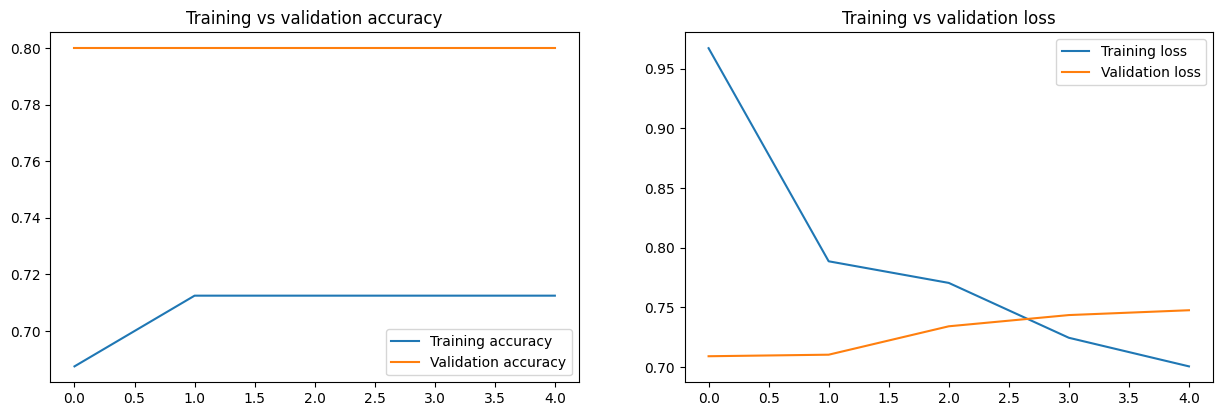

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")
plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")
plt.show()

In [24]:
pred = model.predict(test)

2/2 [==============================] - 1s 544ms/step


In [25]:
pred = np.argmax(pred, axis=1)

In [26]:
labels = train.class_indices

In [27]:
labels

{'Durian Mentega': 0, 'Durian Montong': 1, 'Durian Musang King': 2}

In [28]:
labels = dict((v,k) for k, v in labels.items())

In [29]:
labels

{0: 'Durian Mentega', 1: 'Durian Montong', 2: 'Durian Musang King'}

In [30]:
y_pred = [labels[k] for k in pred]

In [31]:
print(classification_report(x_test.label, y_pred))

                    precision    recall  f1-score   support

    Durian Mentega       0.00      0.00      0.00        10
    Durian Montong       0.70      1.00      0.83        31
Durian Musang King       0.00      0.00      0.00         3

          accuracy                           0.70        44
         macro avg       0.23      0.33      0.28        44
      weighted avg       0.50      0.70      0.58        44



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
print(confusion_matrix(x_test.label, y_pred))

[[ 0 10  0]
 [ 0 31  0]
 [ 0  3  0]]


In [33]:
test_accuracy = model.evaluate(test)[1]

2/2 [==============================] - 1s 259ms/step - loss: 0.7931 - accuracy: 0.7045
